Oscar Meurer

Guillaume Ferreol

Nicolas Reboullet

# OBJECTIVES:

## General Objectives

Write a Python notebook that will 
1) explain with your own words what information the paper brings with respect to what we studied in class and 
2) illustrate the results of the paper by running some experiments. 

You should design these experiments in order to highlight the pros and the cons of the method proposed in the paper.

## Paper-Related Objectives

- This paper studies a a general family of algorithms known as FTRL (Follow The Regularized Leader), but note that when the regularizer is R(w) = ||w||^2, this is exactly the same as OGA. 
- In class, we calibrated the gradient step in OGA as depending on the Lipschitz constant of the functions to optimize. 
- This paper proposes two methods that does not require to know this constant: AdaFTRL and Solo FTRL. 
- Focus on the second one: Solo FTRL. Describe the method, explain how Theorem 2 improves on the results seen in class. Illustrate this improvement on simulations.


# Scale-Free Algorithms for Online Gradient Descent

https://arxiv.org/abs/1502.05744v2

In this notebook, we will: 

1. Remember the theory about Online Gradient Descent, 
2. Implement the Gradient Descent algorithm, 
3. Explain the theory behind SOLO FLTR, what the paper brings, 
4. Implement the algorithm of SOLOT SOLO FLTR, 
5. Compare the performance of SOLO FLTR with the Gradient Descent algorithm.

## Theoretical reminder of Online Optimization Algorithm

The Online Gradient Algorithm (OGA) can be described as follows:

\begin{align*}
& \text{Initialize: } \theta_0 \\
& \text{For } t = 1, 2, \ldots \\
& \quad \text{Receive } x_t \\
& \quad \text{Compute loss } \ell_t = \ell(f(x_t; \theta_{t-1}), y_t) \\
& \quad \text{Compute gradient } g_t = \nabla_{\theta_{t-1}} \ell_t \\
& \quad \text{Update: } \theta_t = \theta_{t-1} - \eta g_t
\end{align*}

where 
1. $\theta_t$ represents the model parameters at time $t$, 
2. $x_t$ is the input data at time $t$, 
3. $f$ is the model function, 
4. $y_t$ is the true label or target at time $t$, 
5. $\ell$ is the loss function, 
6. $g_t$ is the gradient of the loss function with respect to the model parameters, 
7. and $\eta$ is the learning rate.

### Theorem on the regret

![Image Title](theorem_OGA_regret.png)

## Implementation of Online Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### L-Lipschitz Loss functions

The main purpose of the notebook is to compare a L-Lipschitz, with various constants and the scale free update that is given in the paper 
Let's take this online loss function, where L is an input : 

$$Loss =min(∣y−⟨param,x⟩∣,L)$$

In [9]:
def lipschitz_loss(param, x, y, L):

    """ Returns the loss of a single point regarding y (dim 1) and x (multi dimension point)"""
    
    return np.clip(np.abs(y - np.dot(param, x)), 0, L)

Online Gradient Step 

In [6]:
def OnlineGradient(param, x, y, L):
    """
    Computes the gradient of the Lipschitz continuous loss function with respect to the parameter.

    Parameters:
    param (numpy.ndarray): The current parameter vector.
    x (numpy.ndarray): The input feature vector.
    y (float or numpy.ndarray): The target value(s).
    L (float): The Lipschitz constant.

    Returns:
    numpy.ndarray: The gradient vector of the loss function with respect to the parameter.
    """
    residual = y - np.dot(param, x)
    abs_residual = np.abs(residual)
    sign_res = np.sign(residual)
    
    # Gradient initialization
    grad = np.zeros_like(param)
    
    if abs_residual < L:
        grad = -sign_res * x
    elif abs_residual == L:
        grad = np.zeros_like(param)
    
    return grad

### Preparation: sampling some data

What interests us in this paper is the  Lipschitz constant L that describes the loss function $g_n$ as stated in the theorem 1 of the class. 

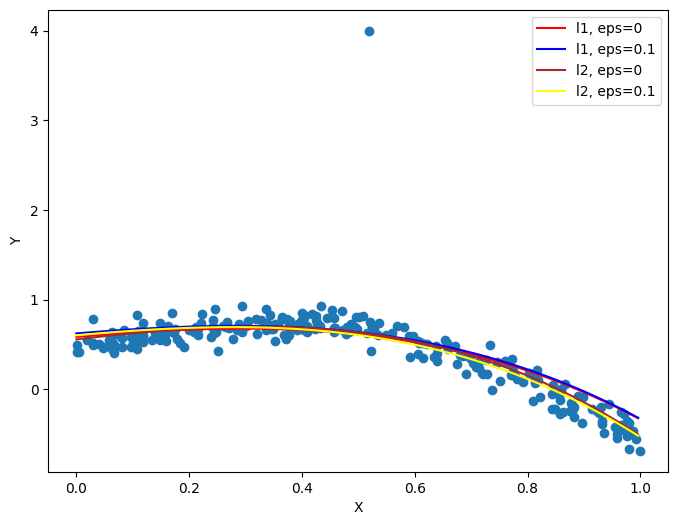

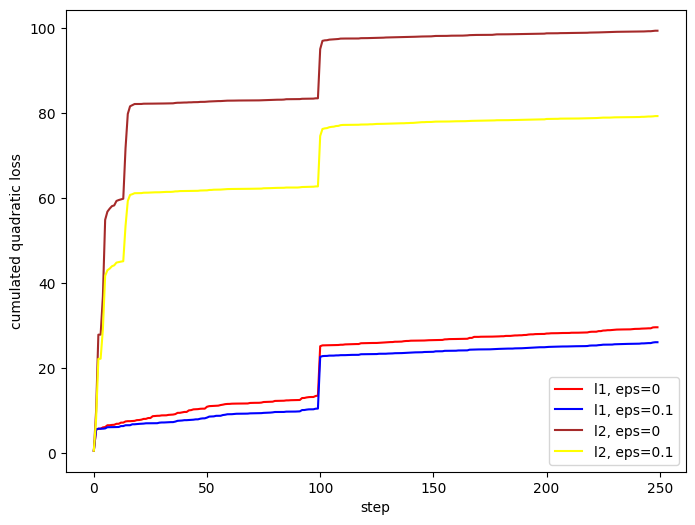

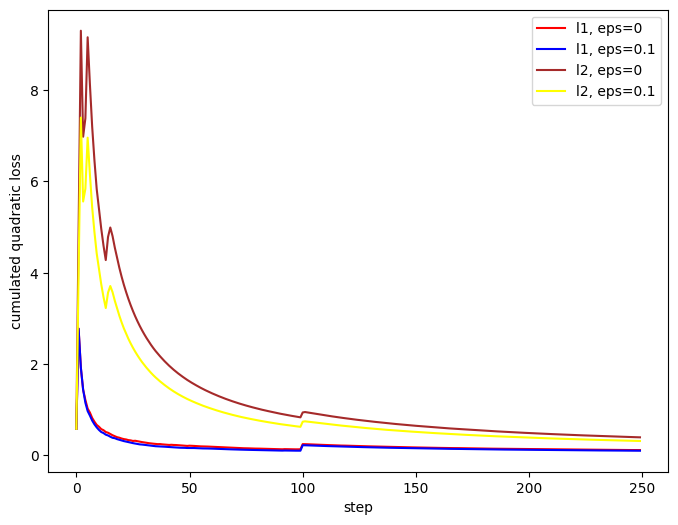

In [8]:


n = 250
d = 4
noise = 0.1

design = np.random.uniform(low=0, high=1, size=n)
X = np.ones(shape=(n,d))
for i in range(1,d):
    X[:,i] = design**i
Y = 1-design**2-np.abs(design-0.5) + noise*np.random.normal(size=n)

Y[100] = 4  ## use this line to test the effect of an outlier

# online learning, compare 4 estimators (loss=absolute or quadratic, epsilon=0 or 0.1),
# but we will only compare their absolute losses

params = np.zeros(shape=(4,d))
quad_losses = np.zeros(shape=(4,n))

for i in range(n):
    quad_losses[0,i] = OnlineLoss(params[0], X[i], Y[i], degree=2, eps=0)
    quad_losses[1,i] = OnlineLoss(params[1], X[i], Y[i], degree=2, eps=0)
    quad_losses[2,i] = OnlineLoss(params[2], X[i], Y[i], degree=2, eps=0)
    quad_losses[3,i] = OnlineLoss(params[3], X[i], Y[i], degree=2, eps=0)
    params[0] = params[0]-OnlineGradient(params[0], X[i], Y[i], degree=1, eps=0)/np.sqrt(i+1)
    params[1] = params[1]-OnlineGradient(params[1], X[i], Y[i], degree=1, eps=0.1)/np.sqrt(i+1)
    params[2] = params[2]-OnlineGradient(params[2], X[i], Y[i], degree=2, eps=0)/np.sqrt(i+1)
    params[3] = params[3]-OnlineGradient(params[3], X[i], Y[i], degree=2, eps=0.1)/np.sqrt(i+1)

    # plot the final estimates

grid = np.arange(0,1,1/n)
Xgrid = np.ones(shape=(n,d))
for i in range(1,d):
    Xgrid[:,i] = grid**i

plt.figure(figsize=(8,6))
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(grid, params[0]@Xgrid.transpose(), color="red", label="l1, eps=0")
plt.plot(grid, params[1]@Xgrid.transpose(), color="blue", label="l1, eps=0.1")
plt.plot(grid, params[2]@Xgrid.transpose(), color="brown", label="l2, eps=0")
plt.plot(grid, params[3]@Xgrid.transpose(), color="yellow", label="l2, eps=0.1")
plt.scatter(design, Y)
plt.legend()
plt.show()

# plot the cumulated errors

plt.figure(figsize=(8,6))
plt.ylabel("cumulated quadratic loss")
plt.xlabel("step")
plt.plot(np.cumsum(quad_losses[0]), color="red", label="l1, eps=0")
plt.plot(np.cumsum(quad_losses[1]), color="blue", label="l1, eps=0.1")
plt.plot(np.cumsum(quad_losses[2]), color="brown", label="l2, eps=0")
plt.plot(np.cumsum(quad_losses[3]), color="yellow", label="l2, eps=0.1")
plt.legend()
plt.show()

# plot the online mean error

plt.figure(figsize=(8,6))
plt.ylabel("cumulated quadratic loss")
plt.xlabel("step")
NN = np.arange(1,251)
plt.plot(np.cumsum(quad_losses[0])/NN, color="red", label="l1, eps=0")
plt.plot(np.cumsum(quad_losses[1])/NN, color="blue", label="l1, eps=0.1")
plt.plot(np.cumsum(quad_losses[2])/NN, color="brown", label="l2, eps=0")
plt.plot(np.cumsum(quad_losses[3])/NN, color="yellow", label="l2, eps=0.1")
plt.legend()
plt.show()


## Explanation of what the paper brings

SOLO FTRL (Scale-free Online Linear Optimization Follow The Regularized Leader) is a method designed to optimize online linear decision processes **without needing advance knowledge of the loss vector norms** or **the Lipschitz constants of the functions being optimized**. 

The regularizer used in SOLO FTRL is of the form $R(w)$, where $R(w)$ is **any strongly convex function**. This choice allows the method to **adapt its learning rate based on the observed data dynamically**, rather than relying on preset parameters. 

The specifics of how the learning rate adapts depend on the cumulative norms of the gradient seen thus far, aligning with the philosophy of adjusting the learning rate based on the scale of incoming data rather than preset estimates.
